In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Database
https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

# Veamos los datos


In [0]:
dataframe = pandas.read_csv("housing.data", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [4]:
X.shape

(506, 13)

In [5]:
Y.shape

(506,)

In [0]:
Y

In [6]:
from sklearn import sklearn

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.33)

AttributeError: ignored

In [0]:
X_train = X[0:400,:]
X_test = X[400:,:]
y_train = Y[0:400,]
y_test = Y[400:,]

In [8]:
X_train.shape

(400, 13)

# MODELO

In [0]:
# Embedding: https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=X.shape[1]))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(1, activation='softmax'))
model.add(Dense(1, input_dim=X.shape[1]))


model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['binary_accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [19]:

hist = model.fit(X_train, y_train,
          epochs=2000,
          batch_size=128)



Epoch 1/2000
400/400 [==============================] - 0s 53us/step - loss: 743.8134 - binary_accuracy: 0.0000e+00
Epoch 2/2000
400/400 [==============================] - 0s 53us/step - loss: 741.1140 - binary_accuracy: 0.0000e+00
Epoch 3/2000
400/400 [==============================] - 0s 47us/step - loss: 738.2774 - binary_accuracy: 0.0025
Epoch 4/2000
400/400 [==============================] - 0s 40us/step - loss: 735.5784 - binary_accuracy: 0.0025
Epoch 5/2000
400/400 [==============================] - 0s 42us/step - loss: 732.8604 - binary_accuracy: 0.0025
Epoch 6/2000
400/400 [==============================] - 0s 45us/step - loss: 730.1697 - binary_accuracy: 0.0025
Epoch 7/2000
400/400 [==============================] - 0s 44us/step - loss: 727.4610 - binary_accuracy: 0.0025
Epoch 8/2000
400/400 [==============================] - 0s 43us/step - loss: 724.7656 - binary_accuracy: 0.0025
Epoch 9/2000
400/400 [==============================] - 0s 44us/step - loss: 721.9589 - binary_a

In [20]:

# EVALUACION
score = model.evaluate(X_test, y_test, batch_size=128)

score

106/106 [==============================] - 0s 255us/step


[61.16823959350586, 0.0]

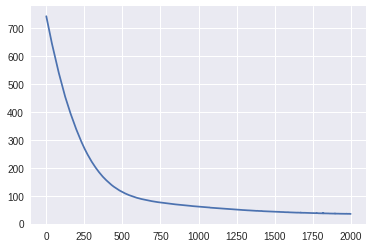

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure
plt.plot(hist.history['loss'])

In [0]:
del model2

In [0]:
# Embedding: https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

model2 = Sequential()
model2.add(Dense(256, activation='relu', input_dim=X.shape[1]))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
#model.add(Dense(1, activation='softmax'))
model2.add(Dense(1))


model2.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['binary_accuracy'])

In [38]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________


In [39]:

hist2 = model2.fit(X_train, y_train,
          epochs=500,
          batch_size=128,
          validation_data=(X_test,y_test))



Train on 400 samples, validate on 106 samples
Epoch 1/500
400/400 [==============================] - 0s 866us/step - loss: 319.5873 - binary_accuracy: 0.0075 - val_loss: 324.8991 - val_binary_accuracy: 0.0000e+00
Epoch 2/500
400/400 [==============================] - 0s 63us/step - loss: 218.3343 - binary_accuracy: 0.0000e+00 - val_loss: 227.2901 - val_binary_accuracy: 0.0000e+00
Epoch 3/500
400/400 [==============================] - 0s 64us/step - loss: 126.9679 - binary_accuracy: 0.0025 - val_loss: 53.1420 - val_binary_accuracy: 0.0094
Epoch 4/500
400/400 [==============================] - 0s 61us/step - loss: 79.0554 - binary_accuracy: 0.0200 - val_loss: 36.3132 - val_binary_accuracy: 0.0000e+00
Epoch 5/500
400/400 [==============================] - 0s 60us/step - loss: 74.8548 - binary_accuracy: 0.0075 - val_loss: 112.8005 - val_binary_accuracy: 0.0094
Epoch 6/500
400/400 [==============================] - 0s 59us/step - loss: 74.9995 - binary_accuracy: 0.0050 - val_loss: 56.6988 -

In [40]:

# EVALUACION
score = model2.evaluate(X_test, y_test, batch_size=128)

score

106/106 [==============================] - 0s 42us/step


[30.129343032836914, 0.01886792480945587]

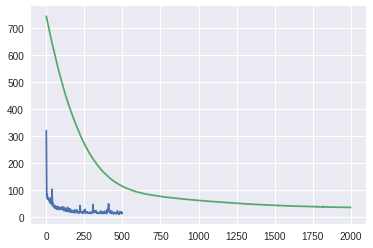

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure
plt.plot(hist2.history['loss'])
plt.plot(hist.history['loss'])

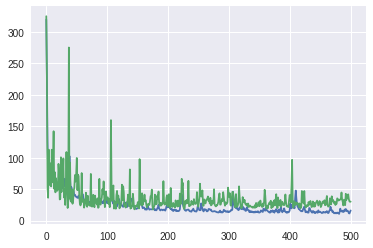

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])